In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/RecHash

/content/drive/.shortcut-targets-by-id/1RbfabtwaBLjUw91iLjZ9z3eugQIdP4hb/RecHash


In [ ]:
import numpy as np
import json
from evaluate import evaluate
from utility import *
import pandas as pd

# Evaluate

In [ ]:
dataset = 'amazon'
# setting = '2core'
setting = '2core' if dataset == 'movielens' else '2core_clothing'
pred_dir = "predictions/%s/" %(dataset)
input_dir = "dataset/%s/%s/" % (dataset, setting)
result_dir = 'results/%s/' % dataset

dat = 'ml' if dataset == 'movielens' else 'az'

In [ ]:
input_dir

'dataset/amazon/2core_clothing/'

In [ ]:
rw_metapaths = [ "userknn_ml_2core_nb10",
                'RH_user_based_az_bmRH_UP_6bit_1r_BU_nb10',
                'RH_user_based_az_bmRH_Uh(U)_BU_nb10',
                'RH_user_based_bmUh(U)_BU_az_UPBP_nw100_nb10_emb300_2core_clothing',
                'RH_user_based_bmUh(U)_BU_az_UserItemMatrix_nw100_nb10_emb300_2core_clohting',
                'RH_user_based_az_bmRH_UPh(P)_BU_nb10',
                'RH_user_based_az_bmRH_UPUh(U)_BU_nb10',

                'bpr_none_1_az_emb300_2core_clothing',
                 'kgat_cnn_az_emb300_2core_clothing',
                'vbpr_none_1_az_emb300_2core_clothing',
                'kgat_cnn_az_emb300_2core_clothing',
                
]
block_metapaths = ['CF','UP','Uh(U)', 'Uh(U)', 'Uh(U)', 'UPh(P)','UPUh(U)',
                   
                   'bpr','kgat_cnn','vbpr','kgat_cnn']


pred_files =  ["userknn_az_2core_clothing_nb10.json",
               "RH_user_based_az_bmRH_UP_6bit_1r_BU_nb10.json", 
               'RH_user_based_az_bmRH_Uh(U)_BU_nb10.json',
               'RH_user_based_bmUh(U)_BU_az_UPBP_nw100_nb10_emb300_2core_clothing.json',
               'RH_user_based_bmUh(U)_BU_az_UserItemMatrix_nw100_nb10_emb300_2core_clohting.json',
               'RH_user_based_az_bmRH_UPh(P)_BU_nb10.json',
               'RH_user_based_az_bmRH_UPUh(U)_BU_nb10.json',

              'bpr_none_1_az_emb300_2core_clothing.json',
               'kgat_cnn_az_emb300_2core_clothing.json',
               'vbpr_none_1_az_emb300_2core_clothing.json',
               'kgat_cnn_az_emb300_2core_clothing.json'
               ] 

In [ ]:
# labels = ['CF','RH UPh(P)','RH Uh(U)','SRH Uh(U)','SRH UPh(P)','RH UP','RH UPUP','RH UPU','RH UPUh(U)']
labels = [ "CF",
                'RH_UP_6bit_1r_BU',
                'RH_Uh(U)_BU_nb10',
                'RH_Uh(U)_BU_az_UPBP',
                'RH_Uh(U)_BU',
                'RH_UPh(P)_BU_nb10',
                'RH_UPUh(U)_BU_nb10',
          

                'bpr',
                 'kgat',
                'vbpr',
                'kgat']


In [ ]:
# labels = ["CF"] + \
#              ['RH %s'%bm for bm in block_metapaths] +\
#              ['SRH %s'%bm for bm in rw_metapaths]

In [ ]:
len(pred_files),len(labels)

(11, 11)

In [ ]:
pd.DataFrame({
    'labels':labels,
    'pred':pred_files})

,labels,pred
0,userknn_ml_2core,userknn_az_2core_clothing_nb10.json
1,RH_UP_6bit_1r_BU,RH_user_based_az_bmRH_UP_6bit_1r_BU_nb10.json
2,RH_Uh(U)_BU_nb10,RH_user_based_az_bmRH_Uh(U)_BU_nb10.json
3,RH_Uh(U)_BU_az_UPBP,RH_user_based_bmUh(U)_BU_az_UPBP_nw100_nb10_em...
4,RH_Uh(U)_BU,RH_user_based_bmUh(U)_BU_az_UserItemMatrix_nw1...
5,RH_UPh(P)_BU_nb10,RH_user_based_az_bmRH_UPh(P)_BU_nb10.json
6,RH_UPUh(U)_BU_nb10,RH_user_based_az_bmRH_UPUh(U)_BU_nb10.json
7,bpr,bpr_none_1_az_emb300_2core_clothing.json
8,kgat,kgat_cnn_az_emb300_2core_clothing.json
9,vbpr,vbpr_none_1_az_emb300_2core_clothing.json


In [ ]:
with open(input_dir + "train.json", 'r') as fp:
    train_set = json.load(fp)
with open(input_dir + "test.json", 'r') as fp:
    test_set = json.load(fp)
with open(input_dir + "item.json", 'r') as fp:
    item_data = json.load(fp)
all_users = list(train_set.keys())
all_items = list(item_data.keys())


In [ ]:
import os
df = None
try:
    os.mkdir(result_dir + "%s/"%th)
except:
    pass
    
assert len(pred_files) == len(labels)
    
for label, pred_file in zip(labels, pred_files): 
        
      result_file = result_dir + pred_file.replace('.json', '.csv') 
        
      if os.path.exists(result_file):
          print("file exists: ",end='')
      else:
        print("make new file: ",end='')
        prediction = json.load(open(pred_dir + pred_file, 'r'))   
        print(len(prediction))
            
        fres = open(result_file, 'w')
        write_header(fres, dataset)    
        evaluate(prediction, dataset, input_dir, all_users, all_items, fres, 'user-item', rank_weights_prec=True, rank_weights_rec=False)
        fres.close()

        print(result_file)
      result = pd.read_csv(result_file, sep='\t')
      result['label'] = label
        
      if df is None:
        df = result
      else:
        df = pd.concat([df, result])
            
df = df.reindex(columns=(['label'] + list([a for a in df.columns if a != 'label']) ))

# df.to_csv(result_dir + '%s_baselines_eval_hash.csv'%(dat), index=False)
df.to_csv(result_dir + '%s_eval_hash_new.csv'%(dat), index=False)


file exists: file exists: file exists: file exists: file exists: file exists: file exists: file exists: file exists: file exists: file exists: 

In [ ]:
df

,label,vtype,group,avg_prec_1,avg_prec_5,avg_prec_10,avg_prec_50,avg_prec_100,avg_rec_1,avg_rec_5,...,norm_ep_5,norm_ep_10,norm_ep_50,norm_ep_100,norm_er_1,norm_er_5,norm_er_10,norm_er_50,norm_er_100,Unnamed: 72
0,userknn_ml_2core,user-item,2to10,0.000234,0.000112,0.000067,0.000017,0.000009,0.000190,0.000464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,userknn_ml_2core,user-item,10to20,0.000646,0.000215,0.000118,0.000031,0.000016,0.000215,0.000344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,userknn_ml_2core,user-item,20to50,0.003711,0.000891,0.000476,0.000103,0.000051,0.000478,0.000602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,userknn_ml_2core,user-item,50to100,0.000000,0.000000,0.000000,0.000160,0.000080,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,userknn_ml_2core,user-item,all,0.000330,0.000134,0.000079,0.000020,0.000010,0.000197,0.000451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,RH_UP_6bit_1r_BU,user-item,2to10,0.002041,0.001068,0.000705,0.000167,0.000083,0.001020,0.003554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RH_UP_6bit_1r_BU,user-item,10to20,0.000000,0.002165,0.001212,0.000335,0.000168,0.000000,0.003247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RH_UP_6bit_1r_BU,user-item,20to50,0.125000,0.045833,0.022917,0.004762,0.002381,0.020833,0.032407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RH_UP_6bit_1r_BU,user-item,50to100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RH_UP_6bit_1r_BU,user-item,all,0.003472,0.001834,0.001080,0.000253,0.000126,0.001157,0.003908,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plot the results

In [ ]:
# filename of all results combined and ready to be plotted 

# df_result_filename = result_dir +  'ml_selected_RH.csv'
df_result_filename = result_dir +  'az_eval_hash_new.csv'


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.cm import get_cmap
import numpy as np
import itertools
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

N = [1,5,10,50,100]
precol = ['avg_prec_%d'%n for n in N]
reccol = ['norm_rec_%d'%n for n in N]
f1col = ['norm_f1_%d'%n for n in N]
epcol = ['norm_ep_%d'%n for n in N]
ercol = ['norm_er_%d'%n for n in N]
genre_cov= ['genre_cov_%d'%n for n in N]
nov = ['novelty_%d'%n for n in N]
linewidth = 3
markersize =9

if dataset == 'movielens' :
    #ranges = ['2to10', '10to20', '20to50', '50to100', '100to1276', 'all']
    ranges = [ 'all']
else:
    ranges = [ 'all']

def plot(result, group, path):
    
    global N, precol, reccol, f1col, epcol, ercol
    # figsize = (30,25)
    figsize = (13,5)
    
    marker, linestyle, color = get_style()    
    fig = plt.figure(figsize=figsize)
    ax = plt.subplot(1,2,1)
    x = N
    plt.xscale('symlog')
    for row in result.itertuples():
        y = result.loc[result['label']==row.label][precol].values[0]
        label = row.label
        label = label.replace("_BU", '')        
        
        if " RW_UPT_" in label:
            label = label.replace("RW_UPT_", "$\mathcal{M}_1$")
        elif " RW_UPU_" in label:
            label = label.replace("RW_UPU_", "$\mathcal{M}_{2}$")       
            
        elif " RH_UPT_" in label:
            label = label.replace("RH_UPT_", "$\mathcal{M}_1$")
        elif " RH_UPU_" in label:
            label = label.replace("RH_UPU_", "$\mathcal{M}_{2}$")
               
        elif " UPTh(T)" in label:
            label = label.replace("UPTh(T)", "$\mathcal{M}_{3}$")
        elif " UPUh(U)" in label:
            label = label.replace("UPUh(U)", "$\mathcal{M}_{4}$")
        
        label = label.replace(' ', '_')
        ax.plot(x, y,label=label, marker = next(marker), linestyle=next(linestyle), color=next(color), linewidth=linewidth, markersize=markersize)
    plt.xlabel('N')
    plt.ylabel('MAP@N')
    plt.title('MAP@N')
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend()
    
    #fig = plt.figure(figsize=(3,2))
    marker, linestyle, color = get_style()
    ax = plt.subplot(1,2,2)
    x = N
    plt.xscale('symlog')
    for row in result.itertuples():
        y = result.loc[result['label']==row.label][reccol].values[0]
        label = row.label
        label = label.replace("_BU", '')        
        
        if " RW_UPT_" in label:
            label = label.replace("RW_UPT_", "$\mathcal{M}_1$")
        elif " RW_UPU_" in label:
            label = label.replace("RW_UPU_", "$\mathcal{M}_{2}$")       
            
        elif " RH_UPT_" in label:
            label = label.replace("RH_UPT_", "$\mathcal{M}_1$")
        elif " RH_UPU_" in label:
            label = label.replace("RH_UPU_", "$\mathcal{M}_{2}$")
               
        elif " UPTh(T)" in label:
            label = label.replace("UPTh(T)", "$\mathcal{M}_{3}$")
        elif " UPUh(U)" in label:
            label = label.replace("UPUh(U)", "$\mathcal{M}_{4}$")
        label = label.replace(' ', '_')
        
        ax.plot(x, y,label=label, marker = next(marker), linestyle=next(linestyle), color=next(color), linewidth=linewidth, markersize=markersize)
    plt.xlabel('N')
    plt.ylabel('Recall@N')
    plt.title('Recall@N')
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend()
    
    plt.tight_layout(pad=0.5)
    plt.savefig(path.replace('.csv', '_acc_%s.png'%group), bbox_inches='tight', dpi=250)
    plt.show()

In [ ]:
def get_style():
    markerset = itertools.cycle(('+', 'x', '^', '*', 'o', 's', 'd', 'p', '<', '>')) 
    lineset = itertools.cycle(('-', ':', ':', ':', ':', ':', ':', ':', ':', ':', ':', ':', ':', ':', ':', ':',))
    colorset = itertools.cycle(( 'r', 'g', 'b', 'k', 'm', 'c', 'peru', 'purple', 'olive', 'dimgray', 'orange', 'lightgreen', 'pink', 'navy'))
    return markerset, lineset, colorset

az_baselines_eval.csv


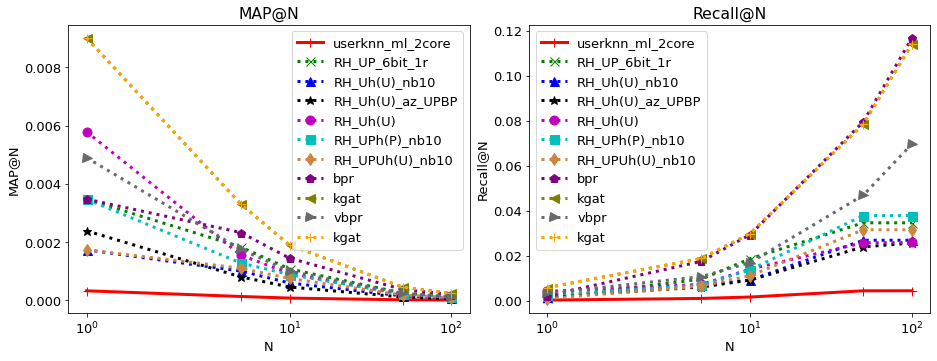

In [ ]:
df = pd.read_csv(df_result_filename)

for r in ranges:
    print('%s_baselines_eval.csv'%(dat))
    plot(df[df['group'] == r], r, result_dir + '%s_hash_allRH_baselines.csv'%(dat))    

az_baselines_eval.csv


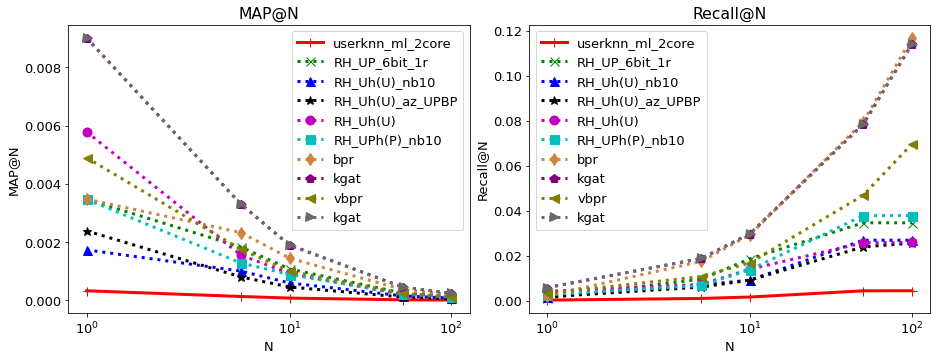

In [ ]:
df = pd.read_csv(df_result_filename)

for r in ranges:
    print('%s_baselines_eval.csv'%(dat))
    plot(df[df['group'] == r], r, result_dir + '%s_hash_allRH_baselines.csv'%(dat))    

<ipython-input-16-2adb67f619c1>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['label'] = df['label'].str.replace('0.6sample_5epo_16bit_1r', '')


az_baselines_eval.csv


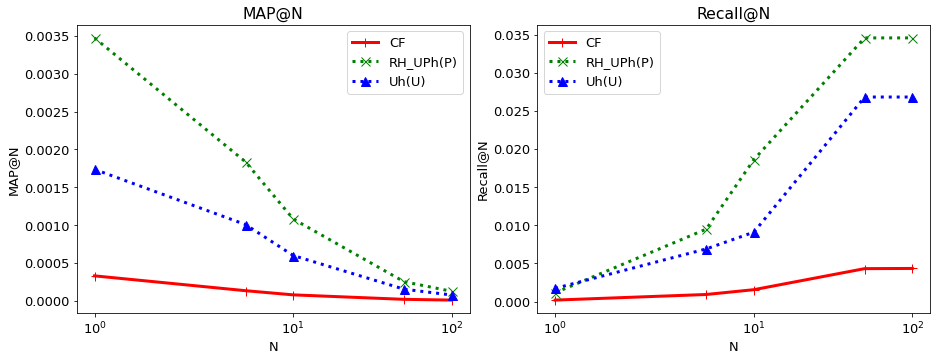

In [ ]:
df = pd.read_csv(df_result_filename)

df['label'] = df['label'].str.replace('0.6sample_5epo_16bit_1r', '')
df['label'] = df['label'].str.replace('RN', 'RH')
df['label'] = df['label'].str.replace('16bit_1r', '')
df['label'] = df['label'].str.replace('8bit_1r', '')
df['label'] = df['label'].str.replace('6bit_1r', '')
df['label'] = df['label'].str.replace('RH_UPTU', 'RH_UPUT')
df['label'] = df['label'].str.replace('RW_UPTU', 'RW_UPUT')

for r in ranges:
    print('%s_baselines_eval.csv'%(dat))
    plot(df[df['group'] == r], r, result_dir + '%s_hash_allRH_baselines.csv'%(dat))    

ml_baselines_eval.csv


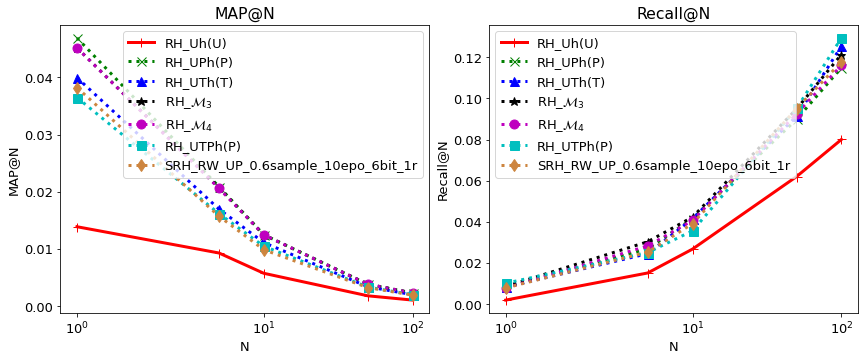

In [ ]:
df_result_filename = result_dir +  'ml_baselines_eval_hash.csv'

df = pd.read_csv(df_result_filename)

for r in ranges:
    print('%s_baselines_eval.csv'%(dat))
    plot(df[df['group'] == r], r, result_dir + '%s_hash_allRH_baselines.csv'%(dat))    